## YELP EDA

In [4]:
YELPPATH = '/share/data/yelp'
RP = 'yelp_academic_dataset_review.json'
BUSINESS = 'yelp_academic_dataset_business.json'

In [5]:
import pandas as pd
import json

In [6]:
rppath = f'{YELPPATH}/{RP}'
busipath = f'{YELPPATH}/{BUSINESS}'

### A single review 

In [7]:
REVIEWS = []
RID_Dict = {}
with open (rppath, 'r') as f:
    for id, line in enumerate(f):
        line = json.loads(line)
        if id == 0: print(line)
        REVIEWS.append(line) 
        RID_Dict[line['review_id']] = line

{'review_id': 'KU_O5udG6zpxOg-VcAEodg', 'user_id': 'mh_-eMZ6K5RLWhZyISBhwA', 'business_id': 'XQfwVwDr-v0ZS3_CbbE5Xw', 'stars': 3.0, 'useful': 0, 'funny': 0, 'cool': 0, 'text': "If you decide to eat here, just be aware it is going to take about 2 hours from beginning to end. We have tried it multiple times, because I want to like it! I have been to it's other locations in NJ and never had a bad experience. \n\nThe food is good, but it takes a very long time to come out. The waitstaff is very young, but usually pleasant. We have just had too many experiences where we spent way too long waiting. We usually opt for another diner or restaurant on the weekends, in order to be done quicker.", 'date': '2018-07-07 22:09:11'}


### Number of reviews
in `yelp_academic_dataset_review.json`

In [8]:
len(REVIEWS)

6990280

In [9]:
from collections import defaultdict
BID_Freq = defaultdict(int)
for review in REVIEWS:
    bid = review['business_id']
    BID_Freq[bid] += 1
# BID_Freq_sorted = sorted(BID_Freq.items(), key = lambda pair:-pair[-1])

### Number of stores
- 好像不只餐廳欸，還有gym、tattoo shop、...

In [54]:
len(BID_Freq)

150346

In [10]:
# source: https://stackoverflow.com/questions/18153054/percentiles-on-x-axis-with-matplotlib
from matplotlib import mlab
import matplotlib.pyplot as plt
import numpy as np
def make_perc_plot(d):
    d = np.sort(np.array(d)).cumsum() # .cumsum(): accumulate sum 
    p = np.array([0.0, 25.0, 50.0, 75.0, 100.0]) # Percentile values
    perc = np.percentile(d, q=p)
    plt.plot(d)
    plt.plot((len(d)-1) * p/100., perc, 'ro') # Place red dots on the specified p values
    # Set tick locations and labels
    plt.xticks((len(d)-1) * p/100., map(str, p))
    
    plt.show()
    return perc

### Percentile plot for number of reviews

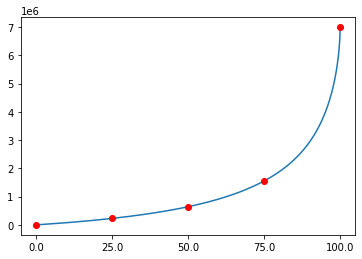

In [11]:
percs = make_perc_plot(list(BID_Freq.values()))

In [12]:
BID_Freq_sorted = sorted(BID_Freq.items(), key = lambda pair:-pair[-1])

In [13]:
p = np.array([0.0, 25.0, 50.0, 75.0, 100.0]) # Percentile values
print('Frequency: 0%(low) - 100%(high)')
for i in range(len(percs)):
    print(f'The {p[i]}% percentile is {percs[i]} (reviews).' )

Frequency: 0%(low) - 100%(high)
The 0.0% percentile is 5.0 (reviews).
The 25.0% percentile is 229203.0 (reviews).
The 50.0% percentile is 642691.5 (reviews).
The 75.0% percentile is 1553412.5 (reviews).
The 100.0% percentile is 6990280.0 (reviews).


In [12]:
# restaurant 比例
# 在每個區間 sample 餐廳
# 對每間 restaurant，算其reviews個數， stars 平均，stars標準差
# 對每間 restaurant，其 stars 分數，與 從reviews中算得的平均分數是一樣ㄉ嗎->是
# sentence length (1. by token 2. by sequence)

In [14]:
Bid2Info = {}
with open (busipath, 'r') as f:
    for line in f:
        line = json.loads(line)
        busi_id = line['business_id']
        category = line['categories']
        name = line['name']
        star = line['stars']
        Bid2Info[busi_id] = {'name':name, 'category':category, 'star':star}
        # Bid2Name[]

In [ ]:
Bid2Info['XQfwVwDr-v0ZS3_CbbE5Xw']

In [35]:
d = list(BID_Freq.values())
d = np.sort(np.array(d)) # not cumulating
p = np.array([0.0, 25.0, 50.0, 75.0, 100.0]) # Percentile values
review_perc = np.percentile(d, q=p)

In [38]:
review_perc

array([5.000e+00, 8.000e+00, 1.500e+01, 3.800e+01, 7.673e+03])

### Sampling from 4 percentile quarters
 - listing the most-reviewed restaurant in each quarter

In [49]:
# the most-reviewed restaurant in each quarter
ix = 0
review_perc = review_perc[::-1]
for busi_id, review_count in BID_Freq_sorted:
    if review_perc[ix] >= review_count >= review_perc[ix+1]:
        print(f'** quarter {ix+1} **')
        name = Bid2Info[busi_id]['name']
        star = Bid2Info[busi_id]['star']
        category = Bid2Info[busi_id]['category']
        print(f'- Store {name} has {review_count} reviews.')
        print(f' stars: {star}, category: {category}')
        ix += 1 
    if ix == len(review_perc)-1:
        break

** quarter 1 **
- Store Acme Oyster House has 7673 reviews.
 stars: 4.0, category: Live/Raw Food, Seafood, Restaurants, Cajun/Creole
** quarter 2 **
- Store Planet Fitness has 38 reviews.
 stars: 3.5, category: Gyms, Fitness & Instruction, Tanning, Trainers, Beauty & Spas, Active Life
** quarter 3 **
- Store Penske Truck Rental has 15 reviews.
 stars: 3.5, category: Transportation, Movers, Home Services, Hotels & Travel, Truck Rental, Automotive
** quarter 4 **
- Store Shalimar Fine Jewelers has 8 reviews.
 stars: 2.5, category: Shopping, Jewelry


In [137]:
for k, v in BID_Freq_sorted[:5]:
    print(f'- {k}')
    print(f'{Bid2Info[k]["name"]}', end='|')
    print(f'#review: {v}')
print('='*40)
for k, v in BID_Freq_sorted[-5:]:
    print(f'{Bid2Info[k]["name"]}', end ='|')
    print(f'#review: {v}')


- _ab50qdWOk0DdB6XOrBitw
Acme Oyster House|#review: 7673
- ac1AeYqs8Z4_e2X5M3if2A
Oceana Grill|#review: 7516
- GXFMD0Z4jEVZBCsbPf4CTQ
Hattie B’s Hot Chicken - Nashville|#review: 6160
- ytynqOUb3hjKeJfRj5Tshw
Reading Terminal Market|#review: 5778
- oBNrLz4EDhiscSlbOl8uAw
Ruby Slipper - New Orleans|#review: 5264
Public Storage|#review: 5
Katona James A Sr Roofing|#review: 5
La Belle Nail Lounge|#review: 5
KFC|#review: 5
Aesthetic Dermatology Associates|#review: 5


### Review stars counting

#### Global star count (count all reviews)

In [53]:
# stars counting (global)
from collections import Counter
d = [x['star'] for x in Bid2Info.values()]
Counter(d)

Counter({5.0: 16307,
         3.0: 18453,
         3.5: 26519,
         4.0: 31125,
         4.5: 27181,
         2.0: 9527,
         2.5: 14316,
         1.5: 4932,
         1.0: 1986})

In [99]:
from collections import defaultdict
byBusiness = defaultdict(lambda: {'star':[] , 'seqlen':[], 'tokenlen':[], 'reviews':[]})
for review in REVIEWS:
    bid = review['business_id']
    byBusiness[bid]['reviews'].append(review)
    byBusiness[bid]['star'].append(review['stars'])
    seqlen, tokenlen = len(review['text']), len(review['text'].split(' '))
    byBusiness[bid]['seqlen'].append(seqlen)
    byBusiness[bid]['tokenlen'].append(tokenlen)

### By-restaurant statistics 

In [156]:
# 對每間 restaurant，算其reviews個數， stars 平均，stars 標準差
def print_restaurant_stats(bid):
    
    '''pass in business id, print out business statistics'''
    
    stats = byBusiness[bid]
    name = Bid2Info[bid]['name']
    busistar = Bid2Info[bid]['star']
    cat = Bid2Info[bid]['category']
    
    
    assert len(stats['tokenlen']) == len(stats['seqlen']) == len(stats['star']) 
    N = len(stats['star'])
    # maxstar, minstar = max(stats['star']), min(stats['star'])
    star_counter = sorted(Counter(stats["star"]).items(), reverse = True)
    avgstar = round(sum(stats['star'])/N, 2)
    varstar = round(np.var(stats['star']),2)
    maxtoklen, mintoklen = max(stats['tokenlen']), min(stats['tokenlen'])
    avgtoken = round(sum(stats['tokenlen'])/N, 2)
    
    reviewtext = random.sample(stats['reviews'], 1)[0]['text']
    # print out 
    print('='*20)
    print(f'- Shop Name: {name} ({bid})')
    print(f'- Shop Category: {cat}')
    print(f'- Shop Star: {busistar}⭐️')
    print(f'- Review Count: {N}')
    print(f'\t⭐️ star| counter: {star_counter}')
    print(f'\t         average: {avgstar}, variance: {varstar}')
    print(f'\tℹ️ token| average: {avgtoken}, max: {maxtoklen}, min: {mintoklen}')
    print(f'\t💬 a randomized review text|')
    print(f'\t {reviewtext}')

In [114]:
# 感覺很適合把 review 物件化
# 也把餐廳物件化
# print_restaurant_stats('XQfwVwDr-v0ZS3_CbbE5Xw')

In [159]:
import random
keys = random.sample(list(Bid2Info.keys()), 5)
for key in keys:
    print_restaurant_stats(key)

- Shop Name: Southeast Regional Park Shooting Range (n725_iCgJ-hGWBVJ9M_xlw)
- Shop Category: Archery, Gun/Rifle Ranges, Active Life
- Shop Star: 4.0⭐️
- Review Count: 7
	⭐️ star| counter: [(5.0, 4), (4.0, 1), (3.0, 1), (2.0, 1)]
	         average: 4.14, variance: 1.27
	ℹ️ token| average: 177.86, max: 381, min: 26
	💬 a randomized review text|
	 Had a great experience today at the range. Jim and all the Range Masters were super helpful and nice. The range is run very well with great respect for safety. We will definitely be back.
- Shop Name: Ed's 50's Cafe (G6Zoh5nlhN_Q94PGvUetvA)
- Shop Category: Restaurants, Breakfast & Brunch
- Shop Star: 4.0⭐️
- Review Count: 52
	⭐️ star| counter: [(5.0, 21), (4.0, 17), (3.0, 9), (2.0, 1), (1.0, 4)]
	         average: 3.96, variance: 1.34
	ℹ️ token| average: 93.17, max: 583, min: 13
	💬 a randomized review text|
	 Hostess Delora greeted Sherry and me immediately as we came in the door and asked where we'd like to be seated.  I commented to Sherry th

#### Most-reviewed shop/restaurant

In [ ]:
# 最多評論的餐廳
print_restaurant_stats('_ab50qdWOk0DdB6XOrBitw')

- Shop Name: Acme Oyster House (_ab50qdWOk0DdB6XOrBitw)
- Shop Star: 4.0⭐️
- Review Count: 7673
	⭐️ star| counter: [(5.0, 3645), (4.0, 2337), (3.0, 969), (2.0, 449), (1.0, 273)]
	         average: 4.12, variance: 1.14
	ℹ️ token| average: 89.39, max: 908, min: 1
	💬 a randomized review text|
	 Just the best.... we start our French Quarter crawl here everyday.  Friendly service, delicious food and Andygator in tap!


#### Secondly most-reviewed shop/restaurant

In [140]:
# 第二多評論的餐廳
print_restaurant_stats('ac1AeYqs8Z4_e2X5M3if2A')

- Shop Name: Oceana Grill (ac1AeYqs8Z4_e2X5M3if2A)
- Shop Star: 4.0⭐️
- Review Count: 7516
	⭐️ star| counter: [(5.0, 4012), (4.0, 1853), (3.0, 788), (2.0, 464), (1.0, 399)]
	         average: 4.15, variance: 1.34
	ℹ️ token| average: 75.04, max: 801, min: 1
	💬 a randomized review text|
	 We walked to supper the night we ate at Oceana Grill on Conti just off Bourbon. It was quaint and very unique  with C lots of different seating areas. I had gator bites for the first time and they were delicious!  Having never tried them before the waiter suggested half fried and the other half Blackened. Great food!


### Food & restaurant ratio

In [154]:
# 有幾個類別（類別是類別還是tags的集合？） 好像是tags...
# 每個類別ㄉ店各有幾間
tags = set()
NoCat = 0 
for ts in Bid2Info.values():
    try:
        ts = ts['category'].split(',')
    except:
        NoCat += 1
        continue
    for t in ts:
        t = t.strip()
        tags.add(t)
print(f'No category: {NoCat}')
print(f'#tags: {len(tags)}') 

No category: 103
#tags: 1311


In [164]:
# tags

In [178]:
tags # given business_id, determine 餐廳/非餐廳 <- 好像辦不到 
# The food tags are collected by `observeation`. 
# NOT COMPLETE
foodtags = ['Restaurants', 'Food', 'Delis', 'Ramen', 
            'Buffets', 'Breakfast', 'Brunch', 'Breakfast & Brunch', 'Fondue', 'Sandwiches', 'Cupcakes', 
            'Coffee', 'Tea','Coffee & Tea', 'Bakeries']
isFood = 0 
for x in Bid2Info.values():
    # print(shoptags)
    shoptags = x['category']
    if not shoptags:
        continue
    for ftag in foodtags:
        if ftag.lower() in shoptags.lower():
            isFood += 1 
            break
print(f'Rest/All ratio: {isFood/len(Bid2Info)}')    

Rest/All ratio: 0.4353025687414364


In [179]:
tags

{'Gas Stations',
 'Whiskey Bars',
 'Commercial Truck Dealers',
 'Car Rental',
 'DJs',
 'Auto Customization',
 'Home & Garden',
 'Wills',
 'Pet Waste Removal',
 'Makeup Artists',
 'Home Health Care',
 'Southern',
 'Personal Injury Law',
 'Car Share Services',
 'Hot Pot',
 'Shaved Snow',
 'Holiday Decorating Services',
 'Public Art',
 'Hospitals',
 'Colleges & Universities',
 'Proctologists',
 'Ziplining',
 'Air Duct Cleaning',
 'Boat Dealers',
 'Muay Thai',
 'Osteopaths',
 'Osteopathic Physicians',
 'Ukrainian',
 'Delis',
 'Rehabilitation Center',
 'Aquarium Services',
 'Lice Services',
 'Courthouses',
 'Parent Cafes',
 'Stucco Services',
 'Pet Groomers',
 'Ramen',
 'Sunglasses',
 'Carpet Dyeing',
 'College Counseling',
 'Medical Law',
 'Middle Schools & High Schools',
 'Waldorf Schools',
 'RV Repair',
 'Cardiologists',
 'Vinyl Records',
 'Dietitians',
 'Tours',
 'Donuts',
 'DUI Law',
 'Kosher',
 'Japanese Curry',
 'Anesthesiologists',
 'British',
 'Massage Therapy',
 'Art Tours',
 'Hon

In [ ]:
 
{"sent_id": "20020304/20.42.01-25605-1", 
 "text": "The United Nations human rights rapporteur , Maurice Copithorne , on Friday once again repeated his stereotyped allegations against the Islamic Republic by expressing concern over what he called human rights violations in Iran .", 
 "opinions": 
 [{"Source": [["Maurice Copithorne"], ["45:63"]], 
   "Target": [["human rights violations in Iran"], ["195:226"]], 
   "Polar_expression": [["expressing concern"], ["156:174"]], 
   "Polarity": "Negative", 
   "Intensity": "Average"}